In [1]:
#importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fastai.tabular.all import *

In [2]:
#importing and reading the dataset
df = pd.read_csv("../input/credit-card-default-predictions/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#Exploratory data analysis

In [4]:
#Knowing the dataset
df.shape

(30000, 25)

In [5]:
#checking the null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
#undertanding how the data is distributed
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#Getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
#Finding the co-relation of given datasets
df.corr().style.background_gradient(cmap = "GnBu")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [9]:
sex = df.SEX.value_counts()

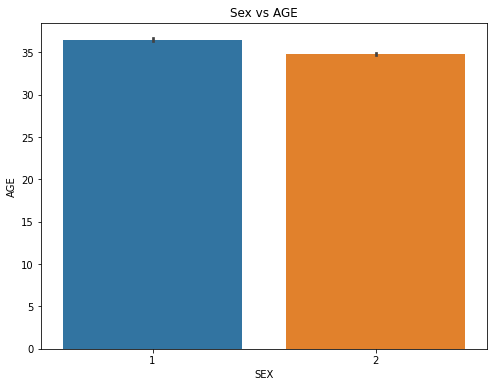

In [10]:
plt.figure(figsize = (8,6))
sns.barplot(x="SEX", y="AGE", data=df)
plt.title("Sex vs AGE");

In [11]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
np.mean(df.LIMIT_BAL)

167484.32266666667

In [13]:
df.LIMIT_BAL

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

In [14]:
df.AGE.value_counts().mean()

535.7142857142857

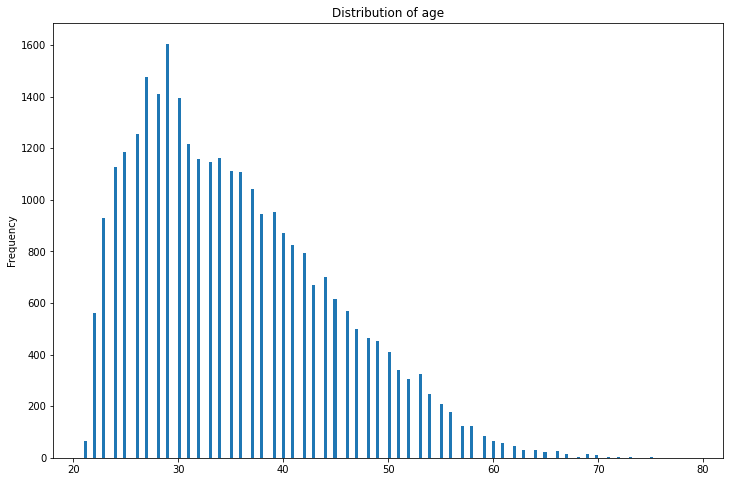

In [15]:
plt.figure(figsize = (12,8))
df["AGE"].plot.hist(bins=200);
plt.title("Distribution of age");

In [16]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [18]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [19]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [20]:
df.PAY_3.value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [21]:
df.PAY_4.value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [22]:
df.PAY_5.value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [23]:
df.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [24]:
df.BILL_AMT1

0          3913.0
1          2682.0
2         29239.0
3         46990.0
4          8617.0
           ...   
29995    188948.0
29996      1683.0
29997      3565.0
29998     -1645.0
29999     47929.0
Name: BILL_AMT1, Length: 30000, dtype: float64

In [25]:
df["BILL_AMT1"]

0          3913.0
1          2682.0
2         29239.0
3         46990.0
4          8617.0
           ...   
29995    188948.0
29996      1683.0
29997      3565.0
29998     -1645.0
29999     47929.0
Name: BILL_AMT1, Length: 30000, dtype: float64

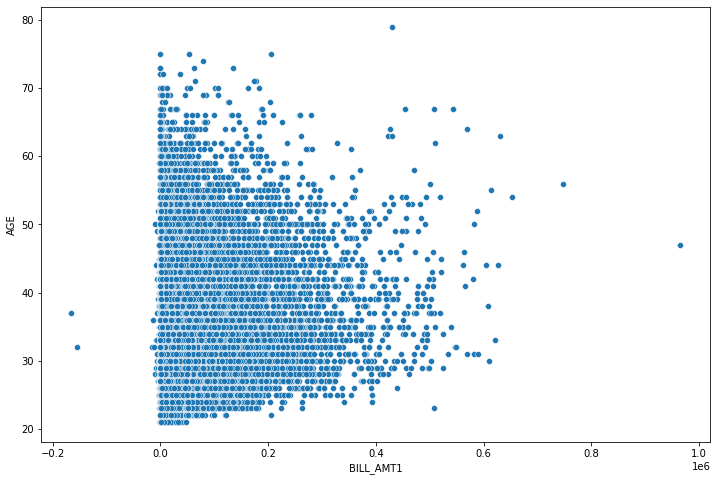

In [26]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=df["BILL_AMT1"], y =df["AGE"]);

In [27]:
df.BILL_AMT2

0          3102.0
1          1725.0
2         14027.0
3         48233.0
4          5670.0
           ...   
29995    192815.0
29996      1828.0
29997      3356.0
29998     78379.0
29999     48905.0
Name: BILL_AMT2, Length: 30000, dtype: float64

In [28]:
df.BILL_AMT3

0           689.0
1          2682.0
2         13559.0
3         49291.0
4         35835.0
           ...   
29995    208365.0
29996      3502.0
29997      2758.0
29998     76304.0
29999     49764.0
Name: BILL_AMT3, Length: 30000, dtype: float64

In [29]:
df.BILL_AMT4

0            0.0
1         3272.0
2        14331.0
3        28314.0
4        20940.0
          ...   
29995    88004.0
29996     8979.0
29997    20878.0
29998    52774.0
29999    36535.0
Name: BILL_AMT4, Length: 30000, dtype: float64

In [30]:
df.BILL_AMT5

0            0.0
1         3455.0
2        14948.0
3        28959.0
4        19146.0
          ...   
29995    31237.0
29996     5190.0
29997    20582.0
29998    11855.0
29999    32428.0
Name: BILL_AMT5, Length: 30000, dtype: float64

In [31]:
df.BILL_AMT6

0            0.0
1         3261.0
2        15549.0
3        29547.0
4        19131.0
          ...   
29995    15980.0
29996        0.0
29997    19357.0
29998    48944.0
29999    15313.0
Name: BILL_AMT6, Length: 30000, dtype: float64

In [32]:
df.PAY_AMT1

0            0.0
1            0.0
2         1518.0
3         2000.0
4         2000.0
          ...   
29995     8500.0
29996     1837.0
29997        0.0
29998    85900.0
29999     2078.0
Name: PAY_AMT1, Length: 30000, dtype: float64

In [33]:
df.PAY_AMT2

0          689.0
1         1000.0
2         1500.0
3         2019.0
4        36681.0
          ...   
29995    20000.0
29996     3526.0
29997        0.0
29998     3409.0
29999     1800.0
Name: PAY_AMT2, Length: 30000, dtype: float64

In [34]:
df.PAY_AMT3

0            0.0
1         1000.0
2         1000.0
3         1200.0
4        10000.0
          ...   
29995     5003.0
29996     8998.0
29997    22000.0
29998     1178.0
29999     1430.0
Name: PAY_AMT3, Length: 30000, dtype: float64

In [35]:
df.PAY_AMT4

0           0.0
1        1000.0
2        1000.0
3        1100.0
4        9000.0
          ...  
29995    3047.0
29996     129.0
29997    4200.0
29998    1926.0
29999    1000.0
Name: PAY_AMT4, Length: 30000, dtype: float64

In [36]:
df.PAY_AMT5

0            0.0
1            0.0
2         1000.0
3         1069.0
4          689.0
          ...   
29995     5000.0
29996        0.0
29997     2000.0
29998    52964.0
29999     1000.0
Name: PAY_AMT5, Length: 30000, dtype: float64

In [37]:
df.PAY_AMT6

0           0.0
1        2000.0
2        5000.0
3        1000.0
4         679.0
          ...  
29995    1000.0
29996       0.0
29997    3100.0
29998    1804.0
29999    1000.0
Name: PAY_AMT6, Length: 30000, dtype: float64

In [38]:
df.rename(columns = {"default.payment.next.month":"default_payment_next_month"}, inplace = True)

In [39]:
cont_names = [col for col in df if df[col].dtype!="O"]
cont_names.remove("default_payment_next_month")

In [40]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [41]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
splits

((#24000) [2354,16336,8130,26317,10354,28807,8589,989,6504,9500...],
 (#6000) [21543,22290,24309,5206,6942,26136,17458,29542,9150,19391...])

In [42]:
cont_names

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [43]:
to = TabularPandas(df,
                  procs=[Normalize],
                  cont_names = cont_names,
                  y_names = "default_payment_next_month",
                  splits = splits
                  )

In [44]:
dls = to.dataloaders(bs = 64)

In [45]:
dls.show_batch()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,24527.000303,500000.002852,1.0,1.0,1.0,32.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,7.339561e-09,-1.195189e-08,305574.999542,231984.004323,228764.993015,185693.996918,179852.997937,178762.994341,9824.000003,10909.999848,7239.000006,5576.000004,6716.999953,6127.999990,0.0
1,490.000314,260000.001617,2.0,1.0,1.0,34.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,16425.999975,6088.000545,4662.998630,3884.999789,4414.000724,2514.000633,6277.000029,4662.999984,4139.999969,4414.000010,2645.999998,7725.000055,0.0
2,10804.999921,119999.999609,2.0,1.0,2.0,26.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,7.339561e-09,-1.195189e-08,11513.000581,12227.000219,13320.999435,15089.999778,16836.000682,18553.999462,1205.999798,1300.000016,2000.000099,1999.999961,2000.000094,2000.000070,0.0
3,16943.999937,60000.003161,1.0,3.0,1.0,54.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,7.339561e-09,-1.000000e+00,58432.000081,58312.000380,59387.999745,29941.000189,1340.999781,1876.001372,20000.000102,3000.000051,3000.000051,999.999976,2000.000094,24999.999964,0.0
4,22693.999938,359999.996983,2.0,1.0,2.0,32.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,-1.000000e+00,-1.195189e-08,192160.002429,197203.991986,119028.000580,103045.998333,15862.999299,10503.000614,20104.000377,4815.999961,2061.000006,15862.999924,21.000108,5016.000006,0.0
5,16245.000031,50000.000535,2.0,3.0,1.0,43.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,7.339561e-09,-1.195189e-08,3237.999290,4672.000245,2864.999399,3878.000262,4809.001258,5725.999981,1500.000000,1056.000035,1069.000075,999.999976,1000.000006,254.999889,0.0
6,13502.000028,20000.000381,2.0,1.0,1.0,23.0,2.255575e-10,2.878071e-09,3.114033e-09,-4.806220e-09,7.339561e-09,-1.195189e-08,11861.998316,11259.000325,12482.001224,10528.001065,9292.998789,17098.999155,1299.999893,1446.000143,500.000239,500.000098,7999.999940,1000.000028,0.0
7,23294.999976,30000.003007,2.0,2.0,2.0,31.0,2.255575e-10,2.878071e-09,3.114033e-09,-2.000000e+00,-2.000000e+00,-2.000000e+00,26829.999465,30900.000683,0.001942,0.000676,0.000583,0.001403,4999.999989,0.000199,-0.000080,0.000220,-0.000082,-0.000013,0.0
8,15203.000008,129999.998373,2.0,2.0,2.0,26.0,-2.000000e+00,-2.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,2.000000e+00,90833.000702,2773.999150,740.001521,740.001788,73757.998458,72799.999054,2788.000026,739.999970,-0.000080,73758.002493,-0.000082,2342.000125,0.0
9,5343.999868,9999.997755,1.0,3.0,2.0,31.0,2.255575e-10,2.878071e-09,2.000000e+00,-4.806220e-09,7.339561e-09,-1.195189e-08,10119.000434,10188.000744,9088.998778,9270.999710,9617.998311,8515.998880,3000.000049,0.000199,295.000218,458.999884,1500.000050,2000.000070,0.0


In [46]:
learn = tabular_learner(dls,layers = [512,256,256,128,64], wd = 0.1)

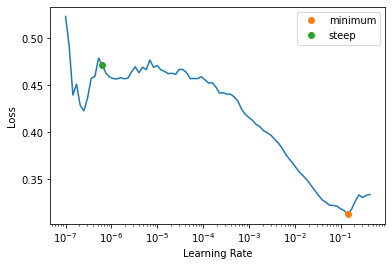

In [47]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))


In [48]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.45e-02, steepest point: 6.31e-07


In [49]:
learn.fit_one_cycle(10, lr_steep)

epoch,train_loss,valid_loss,time
0,0.465368,0.538111,00:04
1,0.424821,0.483269,00:03
2,0.405054,0.419467,00:03
3,0.379349,0.405361,00:03
4,0.350161,0.403460,00:03
5,0.340611,0.390067,00:03
6,0.341734,0.382231,00:03
7,0.341126,0.357381,00:03
8,0.325734,0.359916,00:03
9,0.336345,0.376579,00:04


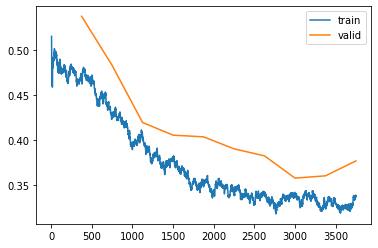

In [50]:
learn.recorder.plot_loss()